# ДЗ_6. "«Случайные марковские процессы»"

## Задание

1. Скачайте текст произведения «Война и мир»: ссылка на [GitHub](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) или [Google Drive](https://drive.google.com/drive/u/0/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU).
2. Очистите его, оставив только русские буквы и символы пробела.
3. Постройте матрицу переходных вероятностей.
4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».
5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.
6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.
7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

In [221]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import requests
%matplotlib inline
sns.set()

## Решение

In [222]:
# Импортируем текст с GitHub и очищаем от лишнего
def text(url):
    response = requests.get(url)
    
    # Проверьте, что запрос был успешным
    assert response.status_code == 200
    
    text = response.text
    
    # Сначала отсавим все русские буквы в нижнем регистре с пробелами и прочими знаками переноса, табуляции... и заменим их на пробел.
    # почему так сложно? можно же было просто оставить пробелы, но я заметил, что тогда часть слов слипаются так как знаки табуляции и перенос строки удаляются
    cleaned_text = re.sub(r'[^а-яё\s]', '', text.lower())
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text
    

In [223]:
# https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_1.txt

#### Матрица переходных вероятностей

In [224]:
# # Создадим словарь, он понадобиться ниже

RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)} # словарь

In [225]:
# probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))
# # probabilities

In [226]:
def tp_matrix_plot(text):
    
    RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
    POS = {l: i for i, l in enumerate(RUSSIAN)} # словарь
    probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))
    # probabilities
    for cp, cn in zip(text[:-1], text[1:]):
        probabilities[POS[cp], POS[cn]] += 1
    probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
    df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))
    plt.figure(figsize=(14,8))
    sns.heatmap(df)
    plt.show()

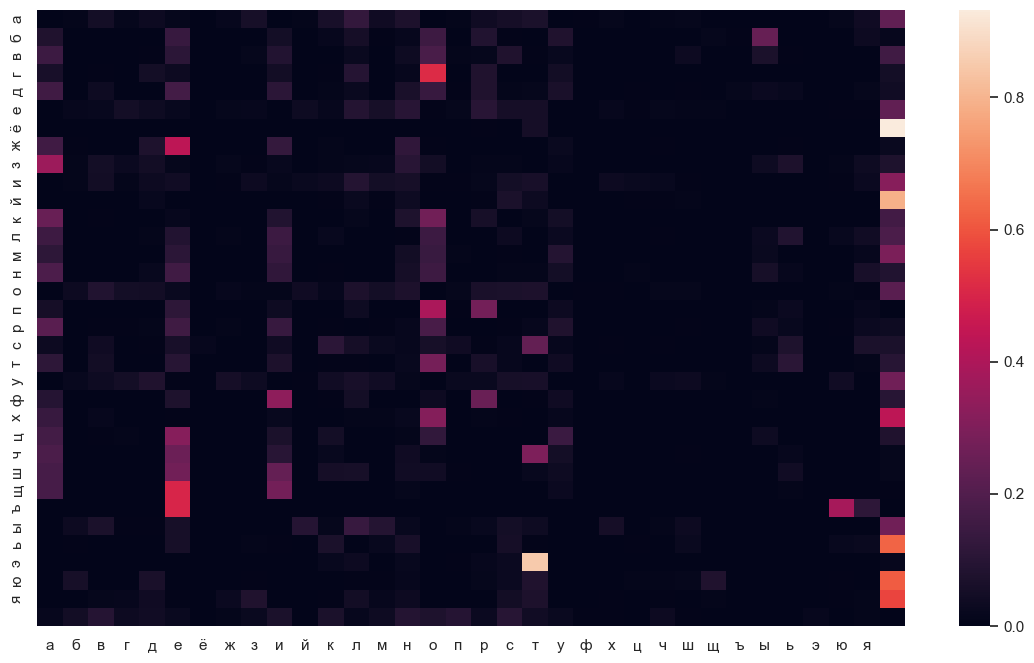

In [227]:
tp_matrix_plot(text("https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_1.txt"))

> По графику видно, что в данном тексте, вероятность перехода из э в т практически равна 95 % *эт*о и понятно, так же большая вероятность у ё с пробелом.\
> Для сравнения я хочу проверить второй текст

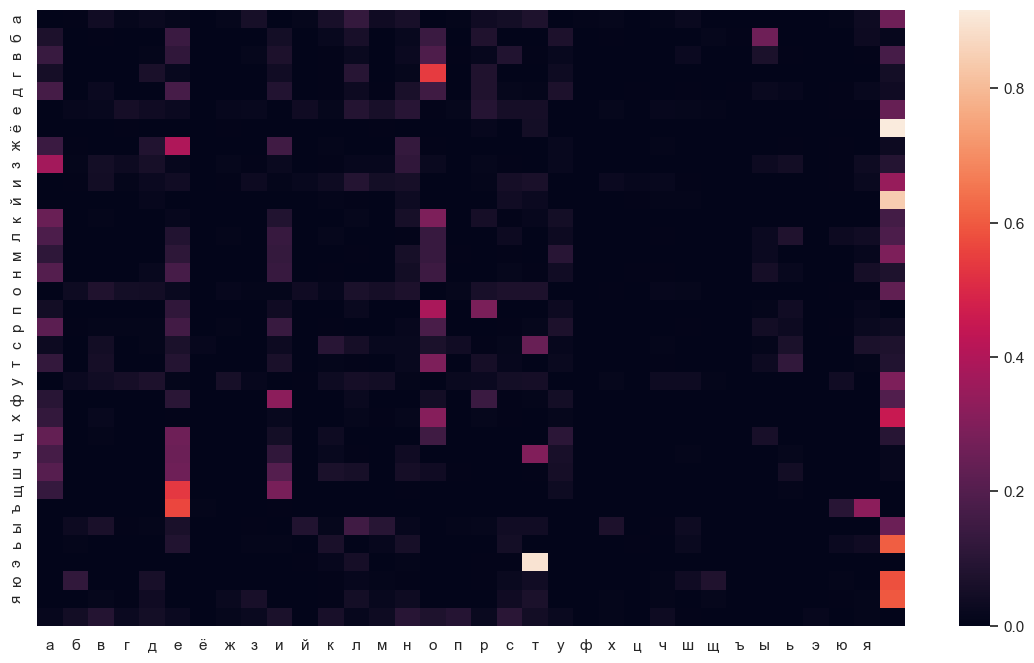

In [228]:
tp_matrix_plot(text("https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_2.txt"))

> Из второго текста так же видно, что автор часто использует те же слова. \
> А значит у нас получилось построить с большрой долей вероятности корректную матрицу переходных вероятностей 

#### Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р»

Для начала посмотрим как подсчитать вероятность, что слово из 4 букв начинается на букву "п" и заканчивается на букву "р" встречается в тексте\
Так как задание можно читать двояко и возможно нужно уточнение, то я сделал два варианта (как я вижу это задание)

In [229]:
def count_words(text, length):
    """
    Ищем все слова из 4 букв
    """
    return sum(1 for word in text.split() if len(word) == length)

def count_words_with_start_and_end(text, start, end, length):
    
    return sum(1 for word in text.split() if word.startswith(start) and word.endswith(end) and len(word) == length)


text_test = text("https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_1.txt")
length = 4
start = "п"
end = "р"

total_words = count_words(text_test, length)
matching_words = count_words_with_start_and_end(text_test, start, end, length)

probability = matching_words / total_words if total_words > 0 else 0

print(f"Вероятность того, что из всех слов из {length} букв, слово начинается на букву '{start}' и заканчивается на букву '{end}', встречается в тексте: {probability}")

Вероятность того, что из всех слов из 4 букв, слово начинается на букву 'п' и заканчивается на букву 'р', встречается в тексте: 0.022668191743787043


In [230]:
print(f"Вероятность того, что слово из {length} букв начинается на букву '{start}' и заканчивается на букву '{end}', встречается в тексте (считаем все слова): {matching_words / len(text_test.split())}")

Вероятность того, что слово из 4 букв начинается на букву 'п' и заканчивается на букву 'р', встречается в тексте (считаем все слова): 0.002109704641350211


#### Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [231]:
import random

# Загрузим и обработаем текст
url = "https://raw.githubusercontent.com/netology-code/ds3-spring-2018/master/7.%20Time_series/7.4/war_and_peace/tom_1.txt"
response = requests.get(url)
text = response.text
text = re.sub(r'[^а-яё\s]', '', text.lower())
text = re.sub(r'\s+', ' ', text)

# Создадим список всех возможных символов
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '

# Создадим словарь для замены символов на их индексы
POS = {l: i for i, l in enumerate(RUSSIAN)}

# Заменим символы на их индексы
letters = [POS[l] for l in re.findall('[а-я]', text)]

# Создадим матрицу переходных вероятностей
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

# Нормализуем вероятности
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

# Начальное состояние - это буква 'Б'
initial_state = POS['б']

word = [initial_state]
for _ in range(7):
    next_symbol_probabilities = probabilities[word[-1], :]
    if sum(next_symbol_probabilities) > 0.0:
        next_symbol = random.choices(range(len(RUSSIAN)), weights=next_symbol_probabilities)[0]
    else:
        next_symbol = random.choice(range(len(RUSSIAN)))
    word.append(next_symbol)

word = [RUSSIAN[i] for i in word]
print(''.join(word))

боещадся


> Учитывая, что мы используем в тексте пробел как букву, то слова могут быть тоже составлены с пробелом.\
> Матрица так же строилась исходя из разделения слов пробелом, что бы не было не верных значений переходной вероятности.

#### Выберем ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.

In [232]:
from hmmlearn.hmm import GaussianHMM
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings("ignore")

In [233]:
series = pd.read_csv("../Series/international-airline-passengers.csv")["Count"]

In [234]:
values = series.values.reshape(-1,1)

In [235]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -893.1837902090575
2 -803.8479631665978
3 -803.8298487679922
4 -781.2049947531581
5 -743.6836689773603
6 -743.2730316424143
7 -713.556181097404
8 -704.7512223008285
9 -716.9957844524903
10 -671.138663718747


Fitting a model with 167 free scalar parameters with only 144 data points will result in a degenerate solution.


11 -671.6276252125622


Fitting a model with 194 free scalar parameters with only 144 data points will result in a degenerate solution.


12 -688.2998281488885
13 -696.3397595336286


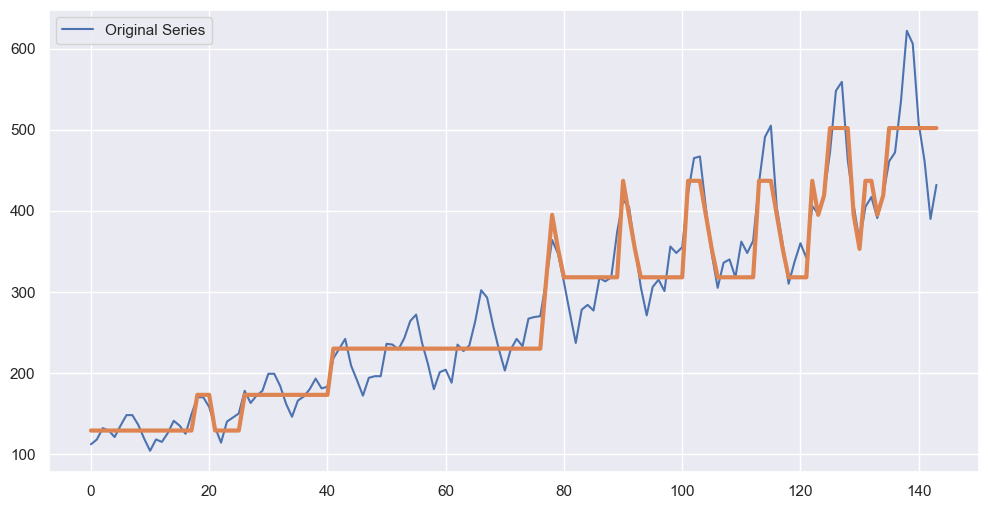

In [236]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values, label='Original Series')
plt.plot(means, linewidth=3)
plt.legend()


In [237]:
# Ну и подберем лучшие параметры:

from sklearn.model_selection import KFold

# Define the range of parameters to test
n_states_range = range(1, 14)

# Define the cross-validation strategy
kf = KFold(n_splits=5)

# Initialize variables to store the best parameters and score
best_params = None
best_score = float('-inf')

for n_states in n_states_range:
    for train_index, test_index in kf.split(values):
        train_values, test_values = values[train_index], values[test_index]
        model_kf = GaussianHMM(n_components=n_states, covariance_type="diag", n_iter=1000)
        model_kf.fit(train_values)
        score = model_kf.score(test_values)
        if score > best_score:
            best_score = score
            best_params = n_states

print("Best number of states:", best_params)
print("Best number of score:", best_score)

Fitting a model with 119 free scalar parameters with only 115 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 115 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 115 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 115 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 116 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 115 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 115 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 115 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 115 data points will result in a degenerate so

Best number of states: 2
Best number of score: -152.0861637903358


In [238]:
model_nf = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model_nf.fit(values)
labels = model_nf.predict(values)

# Calculate the average value of each component
avg_values = model_nf.means_.mean(axis=1)

# Use the labels to select the appropriate mean for each time step
forecast = np.array([avg_values[label] for label in labels])

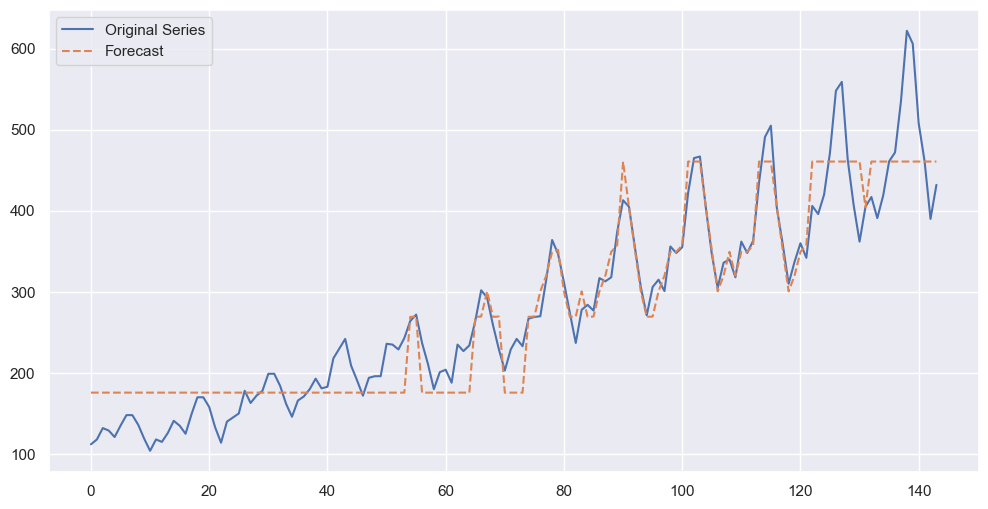

In [239]:
plt.figure(figsize=(12, 6))
plt.plot(values, label='Original Series')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.legend()
plt.show()

> **Вывод:**
>     
> * В работе я использовал данные непосредственно с GitHub
> * Данные были преобразованы в нижний регистр, далены все символы кроме пробела \
> (так же были замены табуляции и переноса строки на пробел) для получения более точных данных матрицы переходных вероятностей 
> * Была получена матрица переходных вероятностей для тома 1 и тома 2 для сравнения, где мы увидели, что наша гипотиза о том что они будут практически идентичны подтвердилась.
> * Посчитал вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р», \
> для всех слов в тексте из 4-х букв, а так же для всех слов в целом в тексте.
> * Используя матрицу переходных вероятностей, сгенерировал слово, начинающееся с буквы «Б» длиной восемь символов.
> * Взял ряд, который использовал в работах ранее и оценил его через HMM, нашел лучшее кол-во компонент (кол-во состояний) и оценку.\
> Попробовал построить через среднее каждой компоненты наивный прогноз ряда.